<a href="https://colab.research.google.com/github/Isurajgarg/Efficient_frontier/blob/main/Efficientfrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modern Portfolio Theory (MPT) and Efficient Frontier**
##Overview:

Modern Portfolio Theory (MPT), introduced by Harry Markowitz in 1952, is a fundamental framework for constructing optimal investment portfolios. MPT provides a systematic approach to portfolio management by considering the trade-off between risk and return. At its core, MPT emphasizes diversification as a means to reduce portfolio risk while maximizing returns.

In this project aims to implement Modern Portfolio Theory (MPT) to construct an efficient frontier for optimal portfolio allocation. In this project i use **historical financial data of Indian stocks** and advanced statistical techniques to analyze asset returns , Covariance and correlations.

##Steps Performed:-
1. Data Collection
2. Data Preprocessing
3. Statistical Analysis
4. Portfolio Optimization
5. Efficient Frontier

In [1]:

#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.optimize as sc


##Step 1

Data Collection: Gathering historical price data for a selection of assets, such as stocks. For this I use Yahoo Finance.

In [2]:
# Here I define the function to download stock Data

In [3]:
def stock_data(stocks,start_date,end_date):
    stock_da = yf.download(stocks,start_date,end_date)
    return stock_da

In [4]:
# Here I am downloading stock data of 3 companies Reliance, Adani Power and Axis Bank

Stock_list =['RELIANCE.NS','ADANIPOWER.NS','AXISBANK.NS']
start = '2019-01-01'
end = '2024-01-01'

stock_data = stock_data(stocks = Stock_list,start_date = start,end_date= end)

[*********************100%%**********************]  3 of 3 completed


In [5]:
stock_data.head(10)

Price          Adj Close                                  Close              \
Ticker     ADANIPOWER.NS AXISBANK.NS  RELIANCE.NS ADANIPOWER.NS AXISBANK.NS   
Date                                                                          
2019-01-01     50.849998  624.932007  1004.360291     50.849998  627.299988   
2019-01-02     50.549999  617.709351   991.279480     50.549999  620.049988   
2019-01-03     50.349998  605.655029   979.049744     50.349998  607.950012   
2019-01-04     50.049999  617.260986   984.335815     50.049999  619.599976   
2019-01-07     50.349998  635.043640   989.801086     50.349998  637.450012   
2019-01-08     51.549999  648.442932   989.711548     51.549999  650.900024   
2019-01-09     50.900002  667.570374   995.176880     50.900002  670.099976   
2019-01-10     50.500000  660.746216   992.264954     50.500000  663.250000   
2019-01-11     50.250000  663.984009   983.798279     50.250000  666.500000   
2019-01-14     49.549999  656.711548   982.678345     49.549999  659.200012   

Price                            High                                    Low  \
Ticker      RELIANCE.NS ADANIPOWER.NS AXISBANK.NS  RELIANCE.NS ADANIPOWER.NS   
Date                                                                           
2019-01-01  1024.966919     51.150002  630.200012  1030.727295     50.450001   
2019-01-02  1011.617737     51.049999  628.500000  1030.453003     50.200001   
2019-01-03   999.137085     50.849998  622.000000  1019.115234     48.799999   
2019-01-04  1004.531616     50.650002  624.750000  1009.834778     49.700001   
2019-01-07  1010.109070     50.799999  640.700012  1022.635437     49.549999   
2019-01-08  1010.017639     52.599998  653.750000  1014.863586     49.750000   
2019-01-09  1015.595093     51.900002  672.049988  1021.309631     50.400002   
2019-01-10  1012.623474     51.099998  668.900024  1015.823669     50.200001   
2019-01-11  1003.983032     50.750000  668.500000  1018.383789     49.849998   
2019-01-14  1002.840149     50.349998  663.000000  1006.223145     49.400002   

Price                                        Open                           \
Ticker     AXISBANK.NS  RELIANCE.NS ADANIPOWER.NS AXISBANK.NS  RELIANCE.NS   
Date                                                                         
2019-01-01  621.900024  1015.000732     51.000000  621.900024  1028.852905   
2019-01-02  617.500000  1006.680298     50.849998  623.000000  1019.023804   
2019-01-03  603.650024   996.714111     50.599998  621.400024  1012.623474   
2019-01-04  609.500000   988.485107     50.400002  612.000000  1003.388733   
2019-01-07  624.200012  1006.680298     50.750000  626.000000  1012.166321   
2019-01-08  630.599976  1002.108643     50.150002  636.000000  1010.429077   
2019-01-09  652.349976  1004.577332     51.750000  652.349976  1016.737976   
2019-01-10  654.599976  1008.508972     51.099998  668.900024  1012.852051   
2019-01-11  658.200012   995.342590     50.750000  665.000000  1012.714905   
2019-01-14  652.549988   993.331055     50.250000  663.000000  1001.194336   

Price             Volume                          
Ticker     ADANIPOWER.NS AXISBANK.NS RELIANCE.NS  
Date                                              
2019-01-01       6302024    12179223     4873335  
2019-01-02       6174960    12386281     7814409  
2019-01-03       7113733    13228602     8144143  
2019-01-04       9620268     8381367     9258272  
2019-01-07       8717066    11735286     6030145  
2019-01-08      14694658    11879875     6152194  
2019-01-09       7317677    18003387     6307118  
2019-01-10       3496789    12751327     4462580  
2019-01-11       2933044     8330315     7069530  
2019-01-14       5325766     6856244     4497030

In [6]:
stock_data.tail(10)

Price          Adj Close                                   Close               \
Ticker     ADANIPOWER.NS  AXISBANK.NS  RELIANCE.NS ADANIPOWER.NS  AXISBANK.NS   
Date                                                                            
2023-12-15    538.849976  1120.349976  2495.600098    538.849976  1120.349976   
2023-12-18    539.349976  1111.349976  2521.000000    539.349976  1111.349976   
2023-12-19    535.450012  1120.250000  2558.100098    535.450012  1120.250000   
2023-12-20    508.799988  1110.250000  2527.149902    508.799988  1110.250000   
2023-12-21    511.649994  1095.400024  2562.550049    511.649994  1095.400024   
2023-12-22    512.549988  1088.300049  2565.050049    512.549988  1088.300049   
2023-12-26    511.700012  1094.250000  2578.050049    511.700012  1094.250000   
2023-12-27    522.450012  1106.349976  2586.850098    522.450012  1106.349976   
2023-12-28    523.400024  1107.849976  2605.550049    523.400024  1107.849976   
2023-12-29    525.150024  1102.300049  2584.949951    525.150024  1102.300049   

Price                            High                                     Low  \
Ticker      RELIANCE.NS ADANIPOWER.NS  AXISBANK.NS  RELIANCE.NS ADANIPOWER.NS   
Date                                                                            
2023-12-15  2495.600098    546.500000  1127.849976  2500.000000    519.599976   
2023-12-18  2521.000000    545.400024  1120.000000  2534.899902    532.049988   
2023-12-19  2558.100098    547.500000  1126.849976  2573.899902    528.099976   
2023-12-20  2527.149902    540.000000  1123.849976  2598.850098    508.700012   
2023-12-21  2562.550049    518.700012  1103.900024  2573.500000    485.000000   
2023-12-22  2565.050049    518.000000  1106.300049  2580.899902    505.000000   
2023-12-26  2578.050049    519.799988  1100.650024  2591.949951    510.100006   
2023-12-27  2586.850098    533.000000  1110.550049  2599.899902    512.000000   
2023-12-28  2605.550049    527.000000  1113.000000  2612.000000    513.000000   
2023-12-29  2584.949951    527.000000  1106.849976  2614.000000    518.000000   

Price                                         Open                            \
Ticker      AXISBANK.NS  RELIANCE.NS ADANIPOWER.NS  AXISBANK.NS  RELIANCE.NS   
Date                                                                           
2023-12-15  1108.599976  2470.050049    537.000000  1119.199951  2478.000000   
2023-12-18  1107.199951  2490.949951    543.150024  1119.699951  2495.600098   
2023-12-19  1114.199951  2525.199951    547.500000  1123.800049  2555.000000   
2023-12-20  1102.699951  2520.000000    535.450012  1122.000000  2571.050049   
2023-12-21  1077.199951  2518.250000    490.000000  1103.900024  2527.000000   
2023-12-22  1085.800049  2547.649902    518.000000  1095.400024  2559.600098   
2023-12-26  1086.699951  2562.699951    515.500000  1091.199951  2568.000000   
2023-12-27  1089.650024  2573.100098    517.400024  1096.050049  2582.000000   
2023-12-28  1098.000000  2586.850098    527.000000  1107.250000  2589.800049   
2023-12-29  1093.949951  2579.300049    520.500000  1101.449951  2611.100098   

Price             Volume                          
Ticker     ADANIPOWER.NS AXISBANK.NS RELIANCE.NS  
Date                                              
2023-12-15      10493441    12048410     7966076  
2023-12-18       2048735     7922468     7082594  
2023-12-19       1607643     6824641     8410302  
2023-12-20       2849065     9848057     8868361  
2023-12-21       2299409    10914682     6882727  
2023-12-22        942799    10600025     8270892  
2023-12-26        831910     5687517     3732832  
2023-12-27       1707299     6132936     4602078  
2023-12-28       1388906    14097667     6151318  
2023-12-29       1270593     8786731     5432292

## Step 2

Data Preprocessing: In this step i do data cleaning and preparing it for analysis.

In [7]:
# Now I only need Close of stock data for further analysis and portfolio optimization

In [8]:
stockdata = stock_data['Close']
stockdata

Ticker,ADANIPOWER.NS,AXISBANK.NS,RELIANCE.NS
Date,,,
2019-01-01,50.849998,627.299988,1024.966919
2019-01-02,50.549999,620.049988,1011.617737
2019-01-03,50.349998,607.950012,999.137085
2019-01-04,50.049999,619.599976,1004.531616
2019-01-07,50.349998,637.450012,1010.109070
...,...,...,...
2023-12-22,512.549988,1088.300049,2565.050049
2023-12-26,511.700012,1094.250000,2578.050049
2023-12-27,522.450012,1106.349976,2586.850098


In [9]:
# Here changed column names

stockdata.columns=  ['Adani Power','Axis Bank','Reliance']

In [10]:
stockdata.head()

,Adani Power,Axis Bank,Reliance
Date,,,
2019-01-01,50.849998,627.299988,1024.966919
2019-01-02,50.549999,620.049988,1011.617737
2019-01-03,50.349998,607.950012,999.137085
2019-01-04,50.049999,619.599976,1004.531616
2019-01-07,50.349998,637.450012,1010.109070


<Figure size 1200x600 with 0 Axes>

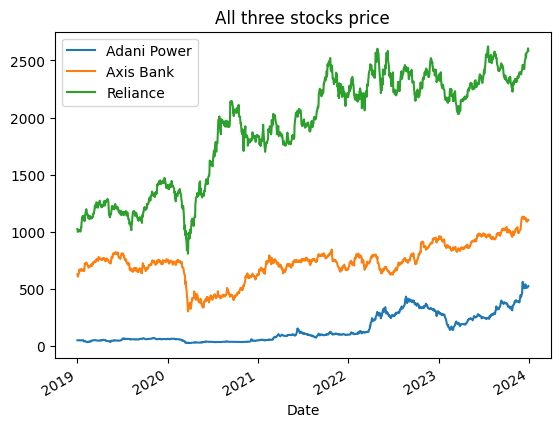

In [11]:
plt.figure(figsize =(12,6))
stockdata.plot()
plt.title('All three stocks price')
plt.show()

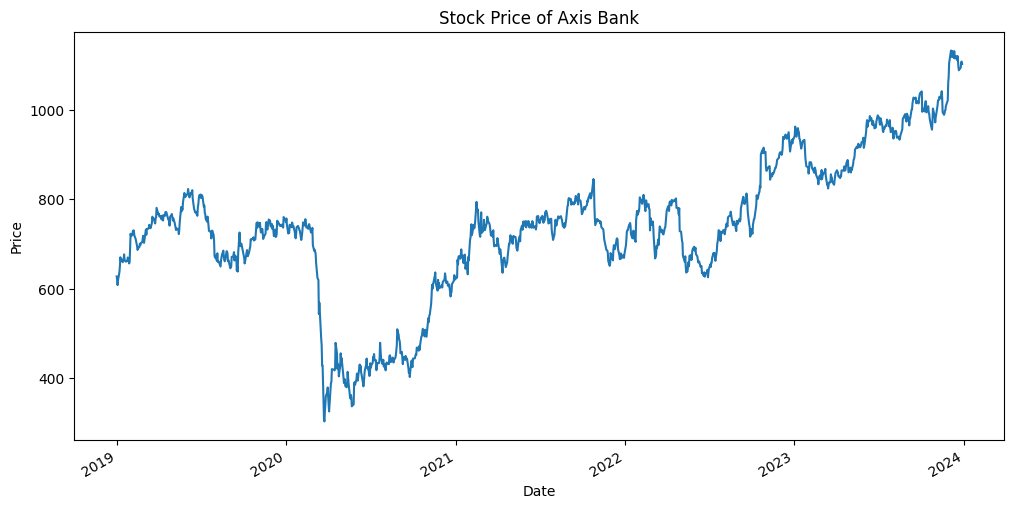

In [12]:
# Plot of Axis Bank stock price

plt.figure(figsize=(12,6))
stockdata['Axis Bank'].plot()
plt.title('Stock Price of Axis Bank')
plt.ylabel('Price')
plt.show()

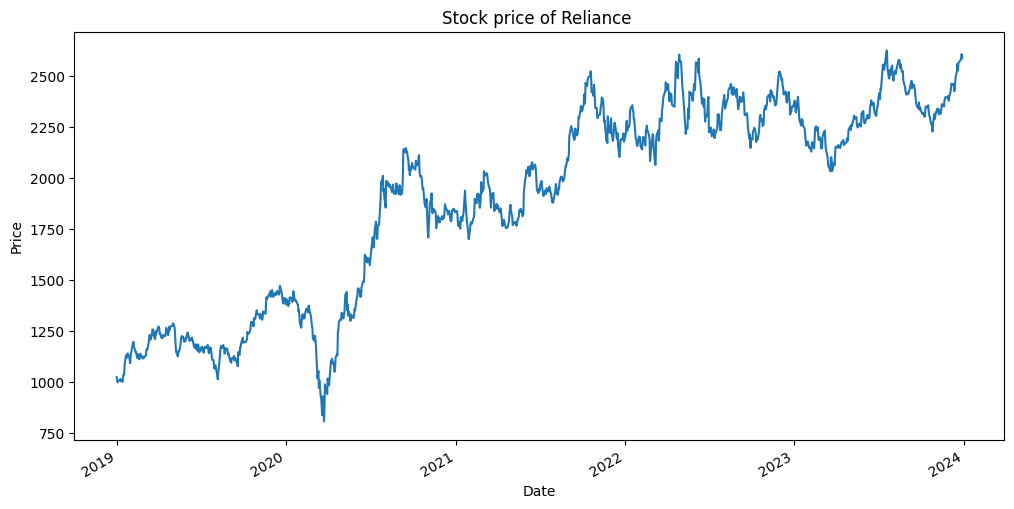

In [13]:
plt.figure(figsize= (12,6))
stockdata['Reliance'].plot()
plt.title('Stock price of Reliance ')
plt.ylabel('Price')
plt.show()

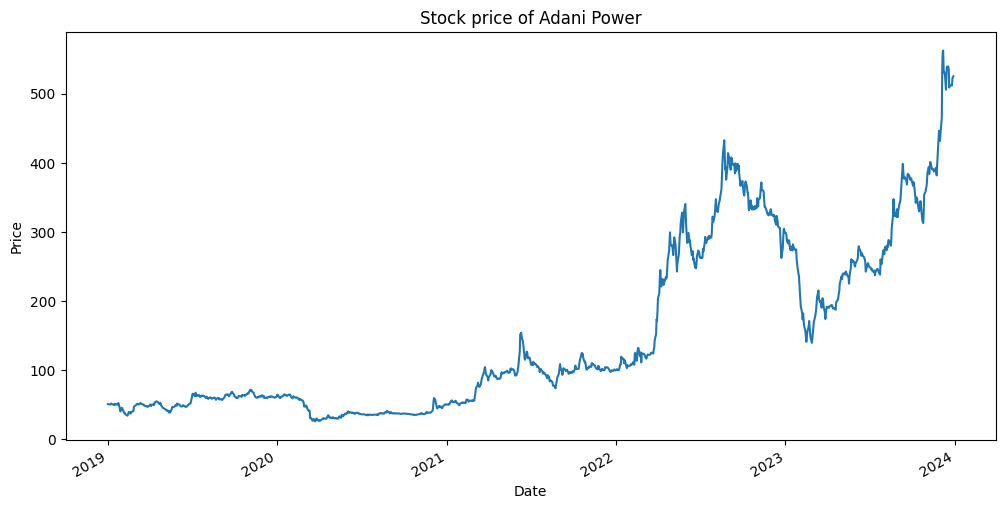

In [14]:
plt.figure(figsize =(12,6))
stockdata['Adani Power'].plot()
plt.title('Stock price of Adani Power')
plt.ylabel('Price')
plt.show()

In [15]:

# Maximum value of stocks in entire interval
stockdata.max(),stockdata.idxmax()

(Adani Power     562.400024
 Axis Bank      1132.449951
 Reliance       2623.026611
 dtype: float64,
 Adani Power   2023-12-07
 Axis Bank     2023-12-05
 Reliance      2023-07-19
 dtype: datetime64[ns])

In [16]:
# Minimum value of stock in the entire interval

stockdata.min(), stockdata.idxmin()

(Adani Power     25.650000
 Axis Bank      303.149994
 Reliance       808.315857
 dtype: float64,
 Adani Power   2020-03-23
 Axis Bank     2020-03-24
 Reliance      2020-03-23
 dtype: datetime64[ns])

## Step 3

Statistical Analysis: Calculating mean returns, standard deviations, and correlations to characterize asset behavior.

In [17]:
# Daily returns on stock

returns = stockdata.pct_change()
returns

,Adani Power,Axis Bank,Reliance
Date,,,
2019-01-01,NaN,NaN,NaN
2019-01-02,-0.005900,-0.011557,-0.013024
2019-01-03,-0.003956,-0.019515,-0.012337
2019-01-04,-0.005958,0.019163,0.005399
2019-01-07,0.005994,0.028809,0.005552
...,...,...,...
2023-12-22,0.001759,-0.006482,0.000976
2023-12-26,-0.001658,0.005467,0.005068
2023-12-27,0.021008,0.011058,0.003413


In [18]:
# Now drop the NaN value from the returns

returns.dropna(inplace = True)

In [19]:
returns.head()

,Adani Power,Axis Bank,Reliance
Date,,,
2019-01-02,-0.005900,-0.011557,-0.013024
2019-01-03,-0.003956,-0.019515,-0.012337
2019-01-04,-0.005958,0.019163,0.005399
2019-01-07,0.005994,0.028809,0.005552
2019-01-08,0.023833,0.021100,-0.000091


In [20]:
# Annualize Return of each stock

annualize_return = returns.mean()*252
np.round(annualize_return*100,2)

Adani Power    64.23
Axis Bank      18.45
Reliance       23.50
dtype: float64

In [21]:
# from above we can say Adani Power provide the highest return in all three approximate 64% annually

In [22]:
# Annualize Volatility of each stock

annualize_volatility = (returns.std())*np.sqrt(252)
np.round(annualize_volatility*100,2)

Adani Power    57.71
Axis Bank      36.88
Reliance       30.41
dtype: float64

<Figure size 1200x600 with 0 Axes>

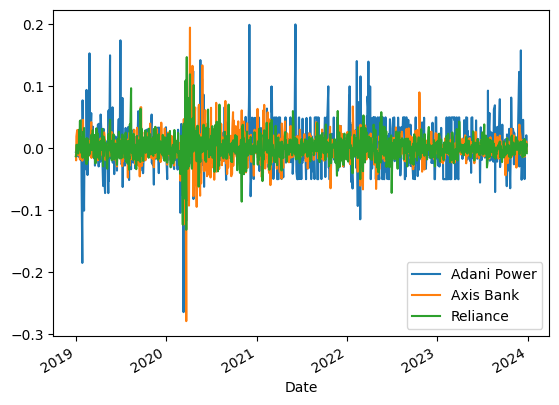

In [23]:
plt.figure(figsize=(12,6))
returns.plot()
plt.show()

# This graph shows Adani Power is more volatile as compared to others same we seen in annualize volatility

In [24]:
# Means Return of the stock
mean_returns = returns.mean()
mean_returns

Adani Power    0.002549
Axis Bank      0.000732
Reliance       0.000932
dtype: float64

In [25]:

# covariance matrix of returns
cov_matrix = returns.cov()
cov_matrix

,Adani Power,Axis Bank,Reliance
Adani Power,0.001322,0.000220,0.000183
Axis Bank,0.000220,0.000540,0.000178
Reliance,0.000183,0.000178,0.000367


In [26]:
correlation = returns.corr()
correlation

,Adani Power,Axis Bank,Reliance
Adani Power,1.000000,0.260908,0.263450
Axis Bank,0.260908,1.000000,0.399045
Reliance,0.263450,0.399045,1.000000


In [27]:
Vol = returns.std()
Vol

Adani Power    0.036355
Axis Bank      0.023234
Reliance       0.019155
dtype: float64

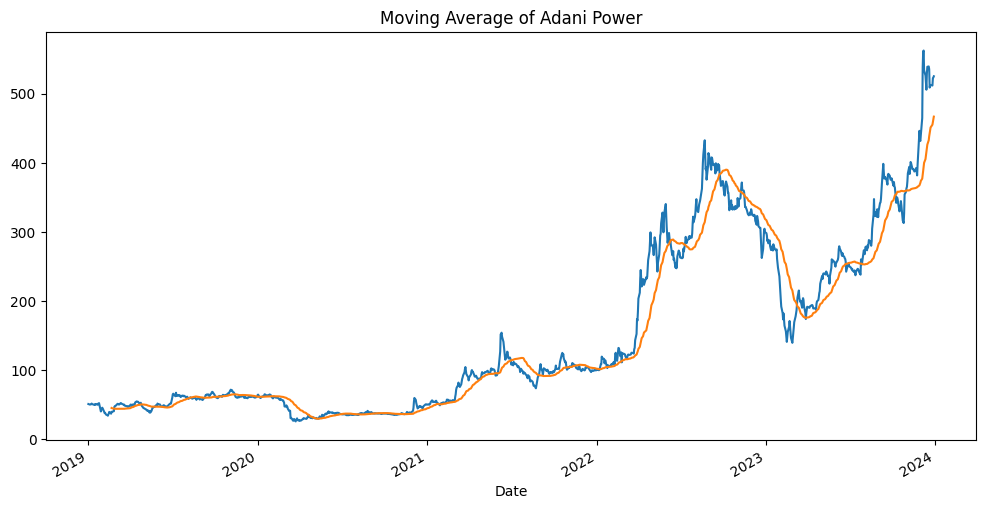

In [28]:
# Moving Average of Adani Power over 36 month window period

plt.figure(figsize=(12,6))
adani = stockdata['Adani Power']
adani_rolling = adani.rolling(window = 36).mean()
adani.plot(label = 'Adani return')
adani_rolling.plot(label=' Moving Average')
plt.title('Moving Average of Adani Power')
plt.show()

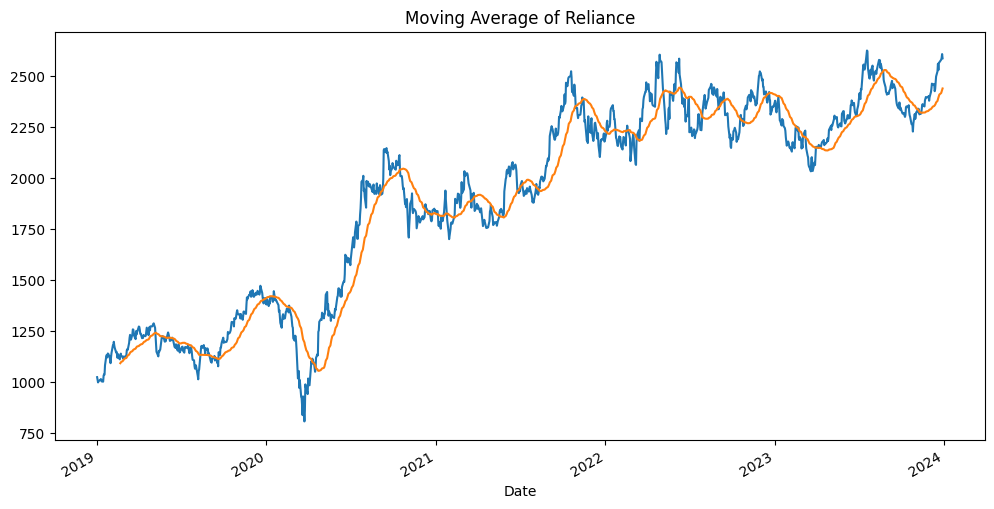

In [29]:
#Moving Average of Reliance over 36 month window period

plt.figure(figsize=(12,6))
reliance = stockdata['Reliance']
reliance_rolling = reliance.rolling(window = 36).mean()
reliance.plot(label = 'Reliance return')
reliance_rolling.plot(label=' Moving Average')
plt.title('Moving Average of Reliance')
plt.show()

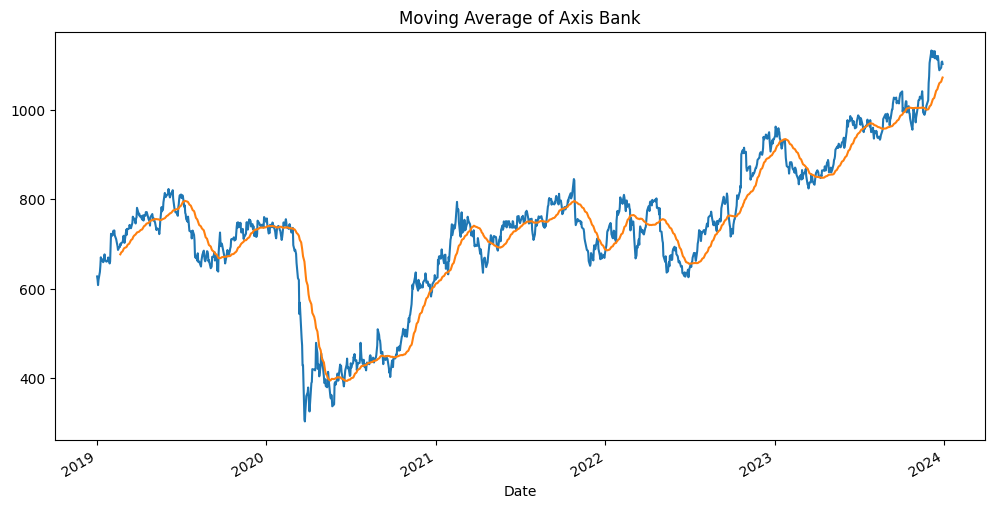

In [30]:
#Moving Average of Axis Bank over 36 month window period

plt.figure(figsize=(12,6))
Axisbank = stockdata['Axis Bank']
axis_rolling = Axisbank.rolling(window = 36).mean()
Axisbank.plot(label = 'Axis Bank return')
axis_rolling.plot(label=' Moving Average')
plt.title('Moving Average of Axis Bank')
plt.show()

## Step 4

Portfolio Optimization: Utilizing mean-variance optimization algorithms to construct portfolios maximizing returns for a given risk level **(Maximum Sharpe Ratio)** or minimizing risk **(Minimum Volatility)** for a given return level.

In [31]:
# First of all we find Portfolio Performance
# Here @ used for doing Dot Product
def portfolio_performance(weights,mean_return, cov_matrix):
    p_return = np.sum(weights*mean_return)
    p_std = np.sqrt(weights.T@(weights@cov_matrix))
    return p_return,p_std

In [32]:
weights = np.array([0.47,0.23,0.30])

port_per = portfolio_performance(weights,mean_returns,cov_matrix)
port_per

(0.0016460362727266128, 0.021850236669174117)

In [33]:
# To find maximum Sharpe Ratio we use negative sharpe ratio and then minimize that negative sharpe to maximum sharpe

def MaxSr(weights,mean_return,cov_matrix,riskfree_rate = 0):
    n = mean_return.shape[0]
    intial_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    args = (mean_return,cov_matrix,riskfree_rate)
    constraints = ({'type':'eq',
                   'fun': lambda x : np.sum(x)-1})
    def negativeSr(weights,mean_return,cov_matrix,riskfree_rate =0):
        Preturns,Pstd = portfolio_performance(weights,mean_return,cov_matrix)
        return -(Preturns-riskfree_rate)/Pstd
    result = sc.minimize(negativeSr,intial_guess,args = args,
                method='SLSQP',bounds = bounds , constraints= constraints)
    max_sr_return,max_sr_volatility = portfolio_performance(result['x'],mean_return,cov_matrix)
    return max_sr_return,max_sr_volatility

In [34]:
# Now I define the function to find minimum volatility

def MinVar(mean_return,cov_matrix):
    '''Here we minimize the volatility of portfolio or find weights where volatility is minimum '''
    n = mean_return.shape[0]
    intial_guess = np.repeat(1/n,n)
    bounds =((0.0,1.0),)*n
    args = (cov_matrix,)
    constraints=({'type':'eq',
                  'fun': lambda x : np.sum(x)-1})
    def portfolio_variance(weights,cov_matrix):
        return np.sqrt(weights.T@(weights@cov_matrix))
    result = sc.minimize(portfolio_variance, intial_guess,args = args ,
                method ='SLSQP', bounds = bounds, constraints= constraints)
    min_var_return,min_var_volatility = portfolio_performance(result['x'],mean_return,cov_matrix)
    return min_var_return,min_var_volatility

##Step 5

Efficient Frontier Visualization: This entails plotting the efficient frontier, a graph representing the range of portfolios that offer the highest expected return for a given level of risk, or the lowest risk for a given level of expected return. This visualization aids in identifying the optimal portfolio allocation balancing risk and return preferences.

In [35]:
def negativeSr(weights,mean_return,cov_matrix,riskfree_rate =0):
        Preturns,Pstd = portfolio_performance(weights,mean_return,cov_matrix)
        return -(Preturns-riskfree_rate)/Pstd

In [36]:
def efficient_plot(mean_return, cov_matrix,num_portfolios = 1000,riskfree_rate= 0,max_sr_return= None,max_sr_volatility= None,min_var_return= None,min_var_volatility= None):

    num_portfolios = num_portfolios # it shows number of portfolios shown on efficient frontier
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_return))
        weights /= np.sum(weights)
        p_return,p_volatility = portfolio_performance(weights,mean_return,cov_matrix)
        results[0, i] = p_return
        results[1, i] = p_volatility
        results[2, i] = -negativeSr(weights, mean_return, cov_matrix, riskfree_rate=riskfree_rate)

    max_sharpe_idx = np.argmax(results[2]) # maximum of negative sharpe ratio
    max_sharpe_return = results[0, max_sharpe_idx]
    max_sharpe_volatility = results[1, max_sharpe_idx]

    plt.figure(figsize=(10, 6))
    plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.3)

    plt.scatter(max_sr_volatility, max_sr_return, marker='*', color='r', s=200, label='Maximum Sharpe Ratio')
    plt.scatter(min_var_volatility, min_var_return, marker='o', color='g', s=200, label='Minimum Volatility')
    plt.title('Efficient Frontier')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.show()

In [37]:
max_ret,max_vol = MaxSr(weights,mean_returns,cov_matrix)
min_ret,min_vol = MinVar(mean_returns,cov_matrix)

In [38]:
max_ret,max_vol

(0.0017110744973052373, 0.022270478962474808)

In [39]:
min_ret,min_vol

(0.0010110958708128889, 0.017112087150612132)

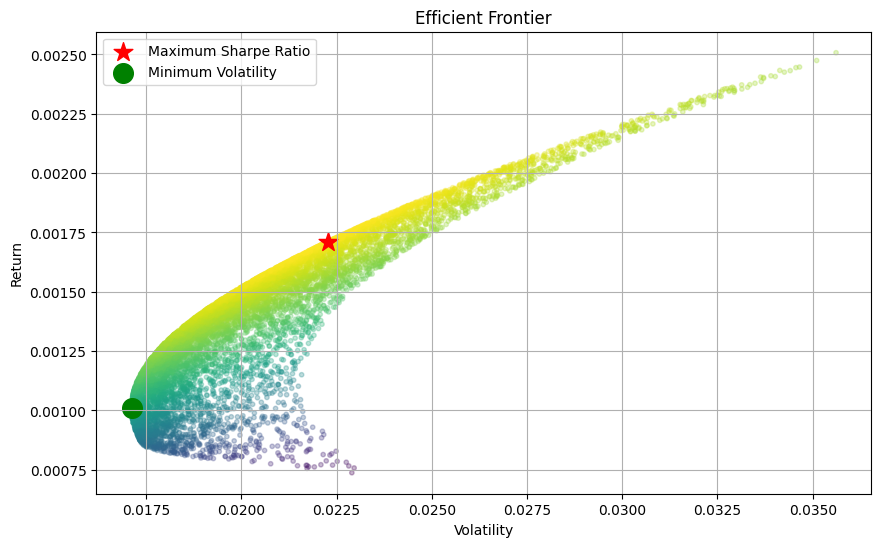

In [40]:
Ply = efficient_plot(mean_returns,cov_matrix,num_portfolios = 10000,max_sr_return= max_ret,max_sr_volatility= max_vol,min_var_return= min_ret,min_var_volatility= min_vol)

In [41]:
# This is our efficient frontier that shows the 10000 number of portfolios and also shown Maximum expected return and minimum volatility